## Problem Statement 2

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_part2_data.csv", na_values = -1)
df.head()

FileNotFoundError: [Errno 2] File insurance_part2_data.csv does not exist: 'insurance_part2_data.csv'

In [671]:
df.shape

(3000, 10)

In [672]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      2999 non-null   float64
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 234.5+ KB


In [673]:
df.isna().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        1
Sales           0
Product Name    0
Destination     0
dtype: int64

In [674]:
df["Duration"].fillna(df["Duration"].mean(), inplace = True) 

In [675]:
df.isna().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [676]:
df.duplicated().sum()

139

In [677]:
df.drop_duplicates(inplace = True)

In [678]:
df.duplicated().sum()

0

In [679]:
df.describe()

,Age,Commision,Duration,Sales
count,2861.000000,2861.000000,2861.000000,2861.000000
mean,38.204124,15.080996,72.145063,61.757878
std,10.678106,25.826834,135.970329,71.399740
min,8.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,12.000000,20.000000
50%,36.000000,5.630000,28.000000,33.500000
75%,43.000000,17.820000,66.000000,69.300000
max,84.000000,210.210000,4580.000000,539.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Commision'}>],
       [<AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Sales'}>]], dtype=object)

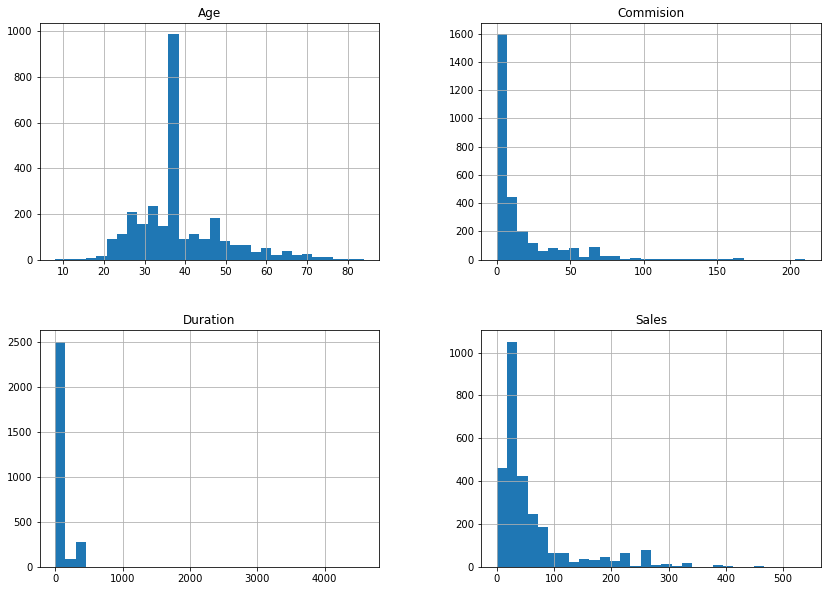

In [680]:
df_col = df.select_dtypes(include= ['int64', 'float64'])
df_col.hist(figsize= (14, 10), bins = 30)

In [681]:
df.skew()

Age           1.103145
Commision     3.104741
Duration     13.787692
Sales         2.344643
dtype: float64

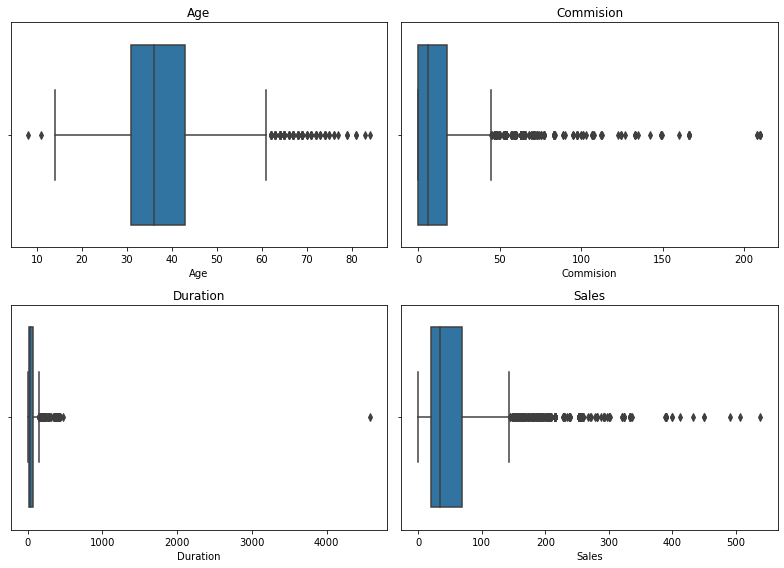

In [682]:
fig,a =  plt.subplots(2,2, figsize=(11, 8))
sns.boxplot(x=df['Age'], ax= a[0][0]).set_title('Age')
sns.boxplot(x=df['Commision'], ax= a[0][1]).set_title('Commision')
sns.boxplot(x=df['Duration'], ax= a[1][0]).set_title('Duration')
sns.boxplot(x=df['Sales'], ax= a[1][1]).set_title('Sales')

fig.tight_layout()

In [683]:
#Function to treat outliers using IQR method
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [684]:
#Outlier treatment

lr_pfp,ur_pfp=remove_outlier(df['Age'])
df['Age']=np.where(df['Age']>ur_pfp,ur_pfp,df['Age'])
df['Age']=np.where(df['Age']<lr_pfp,lr_pfp,df['Age'])

lr_mpa,ur_mpa=remove_outlier(df['Commision'])
df['Commision']=np.where(df['Commision']>ur_mpa,ur_mpa,df['Commision'])
df['Commision']=np.where(df['Commision']<lr_mpa,lr_mpa,df['Commision'])

lr_pfp,ur_pfp=remove_outlier(df['Duration'])
df['Duration']=np.where(df['Duration']>ur_pfp,ur_pfp,df['Duration'])
df['Duration']=np.where(df['Duration']<lr_pfp,lr_pfp,df['Duration'])

lr_mpa,ur_mpa=remove_outlier(df['Sales'])
df['Sales']=np.where(df['Sales']>ur_mpa,ur_mpa,df['Sales'])
df['Sales']=np.where(df['Sales']<lr_mpa,lr_mpa,df['Sales'])

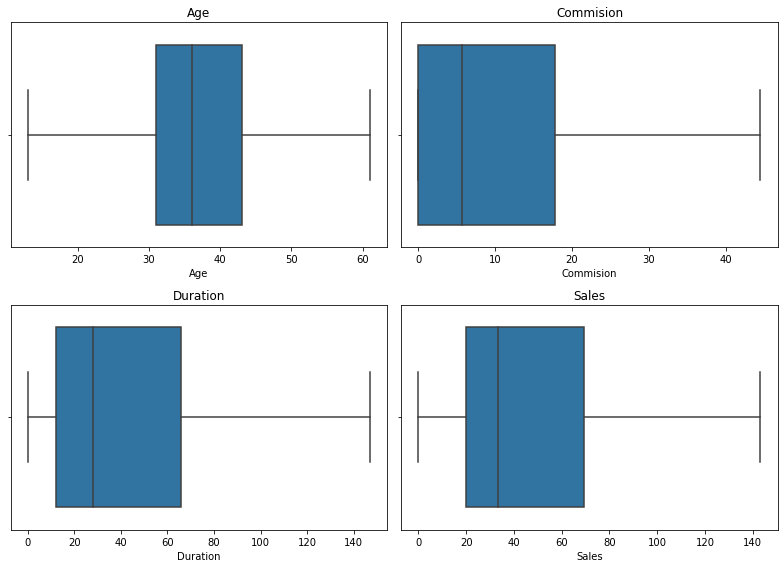

In [685]:
fig,a =  plt.subplots(2,2, figsize=(11, 8))
sns.boxplot(x=df['Age'], ax= a[0][0]).set_title('Age')
sns.boxplot(x=df['Commision'], ax= a[0][1]).set_title('Commision')
sns.boxplot(x=df['Duration'], ax= a[1][0]).set_title('Duration')
sns.boxplot(x=df['Sales'], ax= a[1][1]).set_title('Sales')

fig.tight_layout()

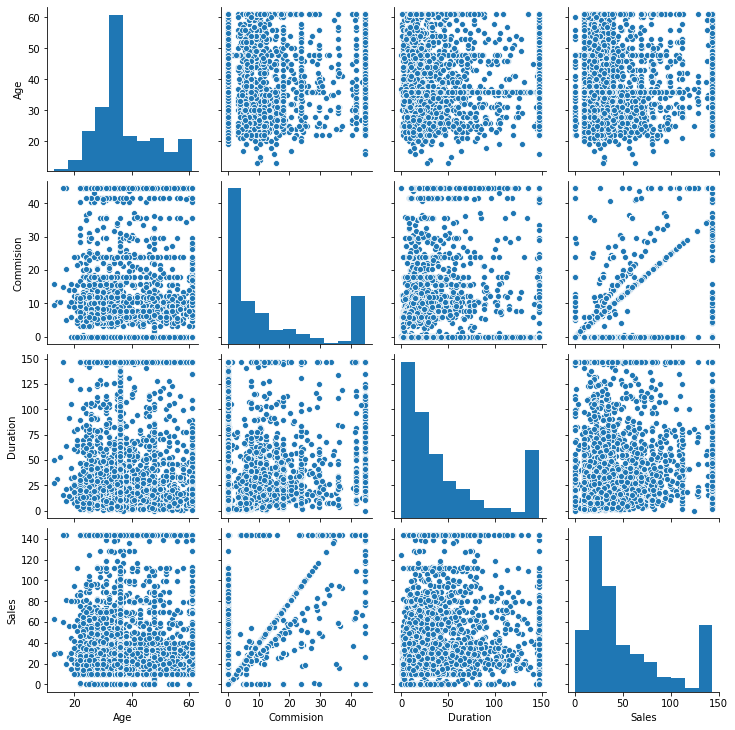

In [686]:
sns.pairplot(df)
plt.show()

In [687]:
correlation_between_variables = df.corr()
correlation_between_variables

,Age,Commision,Duration,Sales
Age,1.000000,0.071246,0.008528,0.021450
Commision,0.071246,1.000000,0.453104,0.682537
Duration,0.008528,0.453104,1.000000,0.534180
Sales,0.021450,0.682537,0.534180,1.000000


<AxesSubplot:>

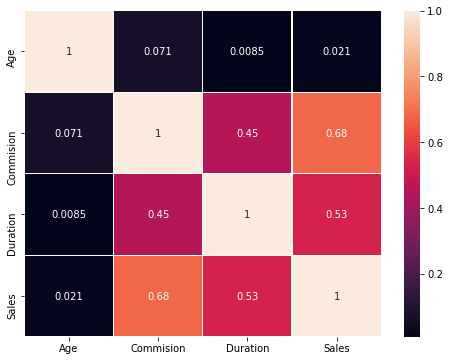

In [688]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(correlation_between_variables, annot = True, linewidth = .2, ax=ax)

In [689]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [690]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   float64
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   float64
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(4), int8(6)
memory usage: 208.5 KB


In [691]:
df.describe()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000
mean,37.896190,1.280671,0.597344,0.319469,11.756865,0.983922,47.363868,51.085089,1.666550,0.261797
std,9.821593,1.003773,0.490518,0.466352,15.502632,0.125799,47.291025,42.604294,1.277822,0.586239
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,20.000000,1.000000,0.000000
50%,36.000000,2.000000,1.000000,0.000000,5.630000,1.000000,28.000000,33.500000,2.000000,0.000000
75%,43.000000,2.000000,1.000000,1.000000,17.820000,1.000000,66.000000,69.300000,2.000000,0.000000
max,61.000000,3.000000,1.000000,1.000000,44.550000,1.000000,147.000000,143.250000,4.000000,2.000000


In [692]:
df.shape

(2861, 10)

In [693]:
df['Claimed'].sum()

914

In [694]:
df['Claimed'].sum()/2861

0.31946871723173714

In [695]:
X = df.drop("Claimed" , axis=1)

y = df.pop("Claimed")

### CART Model

In [696]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [697]:
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [698]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [699]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Insurance_Tree_File = open('c:\\test\insurance_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Insurance_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Insurance_Tree_File.close()

In [700]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.192528
Agency_Code   0.171621
Type          0.001910
Commision     0.074183
Channel       0.004029
Duration      0.264685
Sales         0.226561
Product Name  0.036553
Destination   0.027930


In [701]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 6, 7, 8],
    'min_samples_leaf': [20, 25, 30, 35],
    'min_samples_split': [60,75, 90, 105]
}

dt_model_reg = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model_reg, param_grid = param_grid, cv = 3)

In [702]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 6, 7, 8],
                         '

In [703]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 25, 'min_samples_split': 75}

In [704]:
best_grid = grid_search.best_estimator_

In [705]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [706]:
from sklearn.metrics import classification_report

In [707]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1359
           1       0.69      0.58      0.63       643

    accuracy                           0.78      2002
   macro avg       0.75      0.73      0.74      2002
weighted avg       0.77      0.78      0.78      2002



In [708]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       588
           1       0.66      0.54      0.60       271

    accuracy                           0.77       859
   macro avg       0.73      0.71      0.72       859
weighted avg       0.76      0.77      0.76       859



In [709]:
ytrain_predictscore = best_grid.predict_proba(X_train)
ytest_predictscore = best_grid.predict_proba(X_test)

In [710]:
ytrain_predictscore

array([[0.84722222, 0.15277778],
       [0.67241379, 0.32758621],
       [0.8375    , 0.1625    ],
       ...,
       [0.91780822, 0.08219178],
       [0.85714286, 0.14285714],
       [0.6031746 , 0.3968254 ]])

In [711]:
ytest_predictscore

array([[0.35294118, 0.64705882],
       [0.97142857, 0.02857143],
       [0.36170213, 0.63829787],
       ...,
       [0.53846154, 0.46153846],
       [0.88479263, 0.11520737],
       [0.72222222, 0.27777778]])

### AUC and ROC for training data

AUC: 0.820


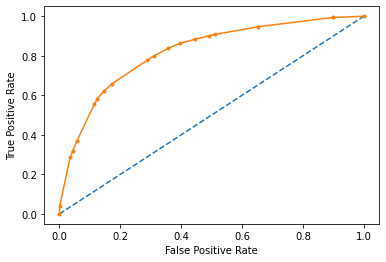

In [712]:
probs = grid_search.predict_proba(X_train)

probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr, marker='.')
plt.show()

### AUC and ROC for test data

AUC: 0.794


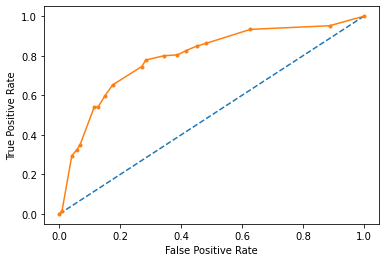

In [713]:
probs = grid_search.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Confusion Matrix

In [714]:
from sklearn.metrics import confusion_matrix

In [715]:
confusion_matrix(train_labels, ytrain_predict)

array([[1189,  170],
       [ 268,  375]], dtype=int64)

In [716]:
grid_search.score(X_train,train_labels) 

0.7812187812187812

In [717]:
confusion_matrix(test_labels, ytest_predict)

array([[513,  75],
       [124, 147]], dtype=int64)

In [718]:
#Test Data Accuracy
grid_search.score(X_test,test_labels)

0.7683352735739232

In [719]:
Accuracy_CART = (1189 + 375)/(1189 + 170 + 268 + 375) 
Accuracy_CART

0.7812187812187812

In [720]:
Accuracy_CART_test = (513 + 147)/(513 + 147 + 75 + 124)
Accuracy_CART_test

0.7683352735739232

### Random Forest

In [721]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'max_depth': [6, 7],
    'max_features': [4, 5],
    'min_samples_leaf': [20, 25, 30],
    'min_samples_split': [45, 60, 75],
    'n_estimators': [101, 301]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)



In [722]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [723]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 5,
 'min_samples_leaf': 20,
 'min_samples_split': 60,
 'n_estimators': 101}

In [724]:
best_grid = grid_search.best_estimator_

In [725]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [726]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1359
           1       0.72      0.58      0.64       643

    accuracy                           0.79      2002
   macro avg       0.77      0.74      0.75      2002
weighted avg       0.79      0.79      0.79      2002



In [727]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       588
           1       0.69      0.56      0.62       271

    accuracy                           0.78       859
   macro avg       0.75      0.72      0.74       859
weighted avg       0.78      0.78      0.78       859



#### ROC - AUC curve

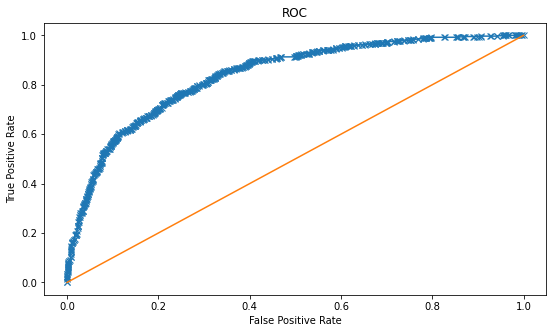

Area under Curve is 0.8379835140878676


In [728]:
# for training data

from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(9,5))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1]))

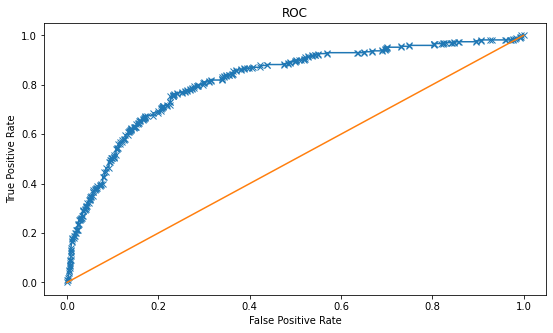

Area under Curve is 0.818384918543063


In [729]:
# for test data

rf_fpr, rf_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(9,5))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1]))

In [730]:
confusion_matrix(train_labels,ytrain_predict)

array([[1214,  145],
       [ 270,  373]], dtype=int64)

In [599]:
confusion_matrix(test_labels,ytest_predict)

array([[519,  69],
       [117, 154]], dtype=int64)

In [732]:
Accuracy_RF_Train = (1214 + 373)/(1214 + 145 + 270 + 373)
Accuracy_RF_Train

0.7927072927072927

In [734]:
Accuracy_RF_Test = (519 + 154)/(519 + 69 + 117 + 154)
Accuracy_RF_Test

0.7834691501746216

### Artificial Neural Network

In [735]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [764]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [500]
}

rfcl = MLPClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [765]:
grid_search.fit(X_trains, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [766]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 500,
 'solver': 'adam',
 'tol': 0.1}

In [767]:
best_grid = grid_search.best_estimator_

In [768]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [769]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.50      0.62      1359
           1       0.42      0.77      0.55       643

    accuracy                           0.59      2002
   macro avg       0.62      0.64      0.58      2002
weighted avg       0.69      0.59      0.60      2002



In [770]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.50      0.62       588
           1       0.42      0.77      0.54       271

    accuracy                           0.59       859
   macro avg       0.62      0.64      0.58       859
weighted avg       0.70      0.59      0.60       859



#### ROC - AUC curve

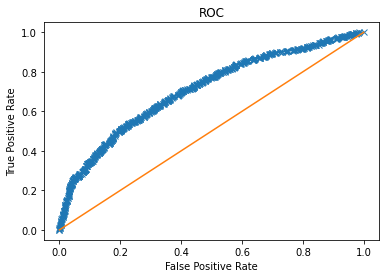

Area under Curve is 0.7089817666223792


In [771]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1]))

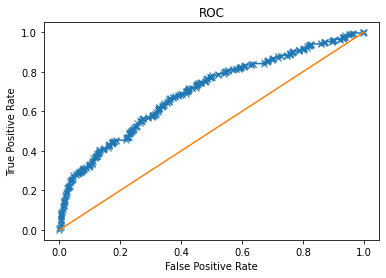

Area under Curve is 0.6989795918367347


In [772]:
#for test data
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1]))

In [773]:
confusion_matrix(train_labels,ytrain_predict)

array([[682, 677],
       [147, 496]], dtype=int64)

In [774]:
confusion_matrix(test_labels,ytest_predict)

array([[293, 295],
       [ 61, 210]], dtype=int64)

In [777]:
Accuracy_ANN_Train = (682 + 496)/(682 + 677 + 147 + 496)
Accuracy_ANN_Train

0.5884115884115884

In [778]:
Accuracy_ANN_Test = (293 + 210)/(293 + 210 + 61 + 295)
Accuracy_ANN_Test

0.5855646100116414